In [1]:
import os as oss
oss.chdir('C:/Users/User/Desktop/Анализ данных/ЛР4-2')

In [2]:
import pandas as pd
data=pd.read_table('Леденцы.dat', sep=';')
data.head(10)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead.
  


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3
5,5,4,5,5,3,3,3,3,3,3,3
6,5,5,4,5,3,3,3,3,3,3,3
7,5,4,5,5,3,3,3,3,3,3,3
8,5,5,5,5,3,3,3,3,3,3,3
9,5,4,5,4,3,3,3,3,3,3,3


In [3]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'Sum of distances')

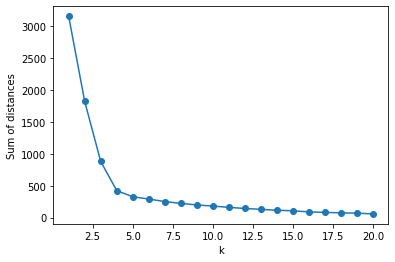

In [10]:
#строим каменистую осыпь (зависимость суммы выбранных растояния от числа кластеров)
#основная идея: расделение на кластеры оптимально в том случае, 
#если при дальнейшем разделении расстояние (примерно) не изменяется
import matplotlib.pyplot as plt
x=[i for i in range(1,21)]
y=[KMeans(n_clusters=k,random_state=42).fit(data).inertia_ for k in x]
plt.plot(x, y, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')

In [11]:
#заметно, что после 4-5 кластеров темп уменьшения расстояния заметно сокращается, значит выбор такого ограничения по расстоянию 
#довольно адекватен
model = KMeans(n_clusters=4, random_state=42)
model.fit(data)
data['cluster'] = model.labels_
data.groupby('cluster').mean()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
cluster,,,,,,,,,,,
0,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


In [ ]:
#ВЫВОДЫ:
#получили на выходе 4 кластера
#1. люди этой группы в большинстве своём испоьзуют леденцы для поддержания полости рта в хорошем, приятном состоянии, 
#также это придаёт им уверенности
#2. люди этой группы в большинстве своём испоьзуют леденцы для поддержание хорошего самочувствия и профилактики заболеваний
#3. людям этой группы леденцы помогают сконцентрироваться и сфокусировать мысли на конкретной задаче
#4. люди этой группы в большинстве своём испоьзуют леденцы, т. к. они заменяют им сладкое
#ФИНАЛЬНЫЙ ВЫВОД
#при попытке поиграться с выбранным числом кластеров, становится очевидно, что оптимальное число-кластеров-4,
#так как при увеличении числа кластеров характеристики новых кластеров практически идентичны со "старыми"